In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [123]:
df=pd.read_csv('zameen-updated.csv')

In [124]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [125]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [126]:
#Selecting only the islamabd cities
# df=df[df['city']=='islamabad']
df = df[df['city'].str.lower() == 'islamabad']

In [127]:
#Select Only House not the flat or other
# df=df[df['property_type']=='House']
df = df[df['property_type'].str.lower() == 'house']

In [128]:
# df=df[df['purpose']=='For Sale']
df = df[df['purpose'].str.lower() == 'for sale']

In [129]:
# df['price']=df['price'].apply(lambda x: x/100000)
df['price'] = df['price'] / 100000

In [130]:
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,165.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,435.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,70.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,345.0,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,1.6 Kanal,For Sale,8,04-05-2019,NaN,NaN,Kanal,1.6,1-5 Kanal
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,270.0,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,1 Kanal,For Sale,8,01-04-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168306,17354458,338,https://www.zameen.com/Property/islamabad_soan...,House,127.0,Soan Garden,Islamabad,Islamabad Capital,33.564427,73.157101,3,10 Marla,For Sale,3,07-18-2019,New United Real Estate,FazliSubhan,Marla,10.0,5-10 Marla
168307,17354467,3341,https://www.zameen.com/Property/g_13_g_13_mark...,House,270.0,G-13,Islamabad,Islamabad Capital,33.650958,72.963030,4,7 Marla,For Sale,4,07-18-2019,Islamabad Property Real Estate Consultants,Abdul Malik Khan,Marla,7.0,5-10 Marla
168308,17354593,338,https://www.zameen.com/Property/islamabad_soan...,House,90.0,Soan Garden,Islamabad,Islamabad Capital,33.564427,73.157101,3,6 Marla,For Sale,2,07-18-2019,New United Real Estate,FazliSubhan,Marla,6.0,5-10 Marla
168309,17354702,165,https://www.zameen.com/Property/islamabad_f_7_...,House,140.0,F-7,Islamabad,Islamabad Capital,33.720413,73.056493,7,1 Kanal,For Sale,7,07-18-2019,Marriott Estate & Builders,Sheharyar Sadiq Tanoli,Kanal,1.0,1-5 Kanal


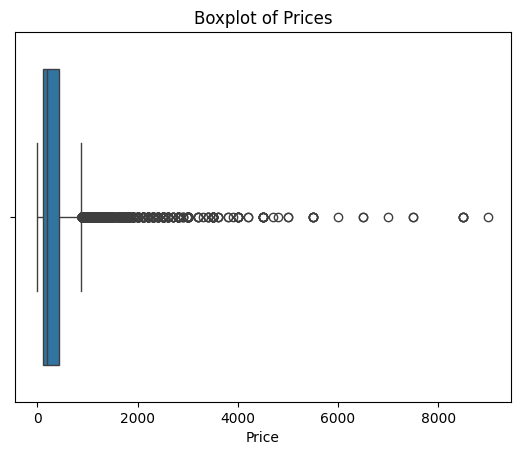

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'price' is a column in df
sns.boxplot(x=df['price'])

plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()


In [132]:
df=df[df['price']<4000]

In [133]:
df=df.drop(df.columns[[0]],axis=1)

In [134]:
df=df.drop(['location_id','page_url','property_type','city','province_name','latitude','longitude','purpose','date_added','agency','agent','Area Type','Area Size','Area Category'],axis=1)


In [135]:
df.isnull().sum()

price       0
location    0
baths       0
area        0
bedrooms    0
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11870 entries, 2 to 168312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     11870 non-null  float64
 1   location  11870 non-null  object 
 2   baths     11870 non-null  int64  
 3   area      11870 non-null  object 
 4   bedrooms  11870 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 556.4+ KB


In [137]:
print(pd.unique(df['location']))

['G-15' 'Bani Gala' 'DHA Defence' 'Ghauri Town' 'Korang Town' 'B-17'
 'G-11' 'Bhara kahu' 'Garden Town' 'Koral Town' 'Soan Garden' 'F-6' 'F-7'
 'I-16' 'E-7' 'Emaar Canyon Views' 'G-13' 'F-17' 'Bahria Town'
 'PWD Housing Scheme' 'F-11' 'Kuri Road' 'Pakistan Town'
 'Chatha Bakhtawar' 'E-11' 'F-10' 'F-8' 'I-8' 'Lehtarar Road' 'G-9' 'E-14'
 'G-8' 'I-14' 'Tarlai' 'Simly Dam Road' 'I-9' 'Burma Town'
 'National Police Foundation O-9' 'Naval Anchorage' 'Islamabad Highway'
 'CBR Town' 'National Police Foundation' 'G-10' 'Jhang Syedan' 'D-17'
 'Arsalan Town' 'Kashmir Highway' 'I-10' 'PWD Road' 'Pir Sohawa' 'Ali Pur'
 'FECHS' 'Khanna Pul' 'Shaheen Town' 'Jhangi Syedan' 'Chak Shahzad' 'H-13'
 'G-14' 'Shah Allah Ditta' 'Islamabad Expressway' 'Margalla Town' 'Tarnol'
 'H-15' 'D-13' 'Meherban Colony' 'Zaraj Housing Scheme'
 'Multi Residencia & Orchards' 'AGHOSH'
 'PAEC Employees Cooperative Housing Society' 'Taramrri' 'E-18'
 'Golra Mor' 'G-12' 'Shahpur' 'Spring Valley' 'Gulshan-e-Khudadad' 'D-12'
 '

In [138]:
df.shape


(11870, 5)

In [139]:
X=df.drop(columns=['price'])
y=df['price']

In [140]:
X = pd.get_dummies(X, drop_first=True)


In [141]:
X = X.astype('float64')


In [142]:
df.to_csv('isb.csv')


In [143]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [144]:
# Define transformers
numeric_features = [ 'bedrooms', 'baths']
categorical_features = ['location','area']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df.columns)



Index(['price', 'location', 'baths', 'area', 'bedrooms'], dtype='object')


In [81]:
# Define transformers
numeric_features = [ 'bedrooms', 'baths']
categorical_features = ['location','area']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso())
])

In [82]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'baths']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location', 'area'])])),
                ('model', Lasso())])

In [83]:
y_pred = pipeline.predict(X_test)

# Output results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 40376.12365540371
R^2 Score: 0.803166531387559


In [85]:
import pickle
pickle.dump(pipeline,open('isb_house_price_prediction.pkl','wb'))

In [86]:
df

,price,location,baths,area,bedrooms
2,165.0,G-15,6,8 Marla,5
3,435.0,Bani Gala,4,2 Kanal,4
4,70.0,DHA Defence,3,8 Marla,3
5,345.0,Ghauri Town,8,1.6 Kanal,8
6,270.0,Korang Town,8,1 Kanal,8
...,...,...,...,...,...
168306,127.0,Soan Garden,3,10 Marla,3
168307,270.0,G-13,4,7 Marla,4
168308,90.0,Soan Garden,3,6 Marla,2
168309,140.0,F-7,7,1 Kanal,7
